# Regresión lineal múltiple en Python

<img src="https://raw.githubusercontent.com/fhernanb/fhernanb.github.io/master/my_docs/logo_unal_color.png" alt="drawing" width="200"/>

Aquí se muestra un ejemplo de como usar Python para ajustar un modelo de regresión lineal múltiple. 

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Ingresando los datos

Los datos **softdrink** corresponden al tiempo $Y$ que un empleado demora para revisar y surtir una máquina dispensadora en función de la cantidad de cajas $X_1$ que surte a la máquina y de la distancia $X_2$ entre la máquina dispensadora y el camión repartidor.

Abajo una figura ilustrativa de la situación.

![Figura ilustrativa](maquina_dispensadora.png)

Para leer los datos usaremos la función `read_csv` de pandas.

In [2]:
file = 'https://raw.githubusercontent.com/fhernanb/Python-para-estadistica/master/03%20Regression/Regresi%C3%B3n%20lineal%20m%C3%BAltiple/softdrink.csv'
dt = pd.read_csv(file)

Para mostrar la parte inicial de los datos usamos `head()`

In [3]:
dt.head()

,Obs,y,x1,x2
0,1,16.68,7,560
1,2,11.50,3,220
2,3,12.03,3,340
3,4,14.88,4,80
4,5,13.75,6,150


## Diagrama de dispersión

Para crear el diagrama de dispersión usamos las siguientes instrucciones.

In [4]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

fig = pyplot.figure(figsize=(8, 6))
ax = Axes3D(fig)

x1 = dt["x1"]
x2 = dt["x2"]
y = dt["y"]

ax.scatter(x1, x2, y, marker='*', c='r')
ax.set_xlabel('Cantidad de cajas')
ax.set_ylabel('Distancia (metros)')
ax.set_zlabel('Tiempo (minutos)');

<Figure size 800x600 with 0 Axes>

## Ajustando el modelo por medio de fórmulas con `statsmodels.formula.api`

In [5]:
# Fit regression model (using the natural log of one of the regressors)
mod = smf.ols('y ~ x1 + x2', data=dt).fit()

Para obtener un resumen del modelo ajustado usamos el siguiente código.

In [6]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     261.2
Date:                Tue, 24 Dec 2024   Prob (F-statistic):           4.69e-16
Time:                        10:56:05   Log-Likelihood:                -63.415
No. Observations:                  25   AIC:                             132.8
Df Residuals:                      22   BIC:                             136.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3412      1.097      2.135      0.0

Para extraer los $\beta$ estimados se usa el siguiente código.

In [7]:
mod.params

Intercept    2.341231
x1           1.615907
x2           0.014385
dtype: float64

Para extraer el $\sigma^2$ estimado se usa el atributo `mse.resid` sobre el objeto `mod`.

In [8]:
mod.mse_resid

10.624167155479668

Una lista completa con todos los atributos puede [ser consultada aquí](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html)

## ¿Cómo agregar el plano de regresión?

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 24 Dec 2024   Prob (F-statistic):           4.83e-98
Time:                        10:56:06   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

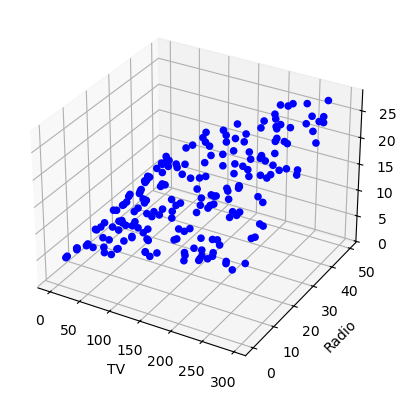

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

url = "https://raw.githubusercontent.com/fhernanb/datos/refs/heads/master/Advertising"
dt = pd.read_csv(url, sep="\t")

model = sm.ols(formula='Sales ~ TV + Radio', data = dt)
fit = model.fit()

print(fit.summary())

xx, yy = np.meshgrid(dt['TV'], dt['Radio'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20)                # generate a mesh
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'Radio': y_surf.ravel()})
out = fit.predict(exog = exog)

exog = pd.core.frame.DataFrame({'TV':xx.ravel(),'Radio':yy.ravel()})
out = fit.predict(exog=exog)

print(xx.shape)

ax.scatter(dt['TV'], dt['Radio'], dt['Sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

Se le recomienda al lector visitar [esta página](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html) para ver más ejemplos.

<div class="alert alert-info">
  <strong>Tarea</strong> <br>
    - Replicar este ejemplo con R y comparar. <br>
    - Hacer otros ejercicios con Python.
</div>